In [97]:
import TurbPy as tb
from TurbPy.imports import *

In [98]:
# deck = 'KH_Lv1di/'
# deck = 'KH/'
# deck = 'KH_subash/'
deck = 'KH_new/'
# deck = 'KH_400ppc/'
# deck = '/GEM_feb26/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_beta0.1/'

dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))
twpe = np.linspace(0, times[-1] * info['dt*wpe'], len(times))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

In [99]:
t = 50

sp = 'electron'
jxe = tb.load_var('jx', dirs, times[t], sp)
jye = tb.load_var('jy', dirs, times[t], sp)
jze = tb.load_var('jz', dirs, times[t], sp)

sp = 'ion'
jxi = tb.load_var('jx', dirs, times[t], sp)
jyi = tb.load_var('jy', dirs, times[t], sp)
jzi = tb.load_var('jz', dirs, times[t], sp)

ex = tb.load_var('ex', dirs, times[t])
ey = tb.load_var('ey', dirs, times[t])
ez = tb.load_var('ez', dirs, times[t])

In [100]:
dt = info['dt*wce'] * info['fields_interval']

In [101]:
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

In [102]:
# Calculate ###
# JE = tb.JE_calc(dirs)
# en = tb.en_calc(dirs)

In [103]:
# ## Read ##
ds = tb.read_JE(dirs)
en = tb.read_calc_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

In [104]:
print(ds['JE'])

0    -1.802766e-07
1     4.820744e-06
2     5.143900e-06
3     1.807584e-06
4    -1.283724e-06
          ...     
88    4.442043e-08
89   -8.583896e-08
90   -3.226363e-08
91    4.012310e-08
92   -1.125672e-07
Name: JE, Length: 93, dtype: float64


In [105]:
n = 10
twciN = twci[n:]
print(twci[n])
JE_int = -sci.integrate.cumulative_trapezoid(ds['JE'][n:] * dt, initial = 0)
dE = en['EM'][n:]-en['EM'][n]+en['EE'][n:]-en['EE'][n]

9.99893232


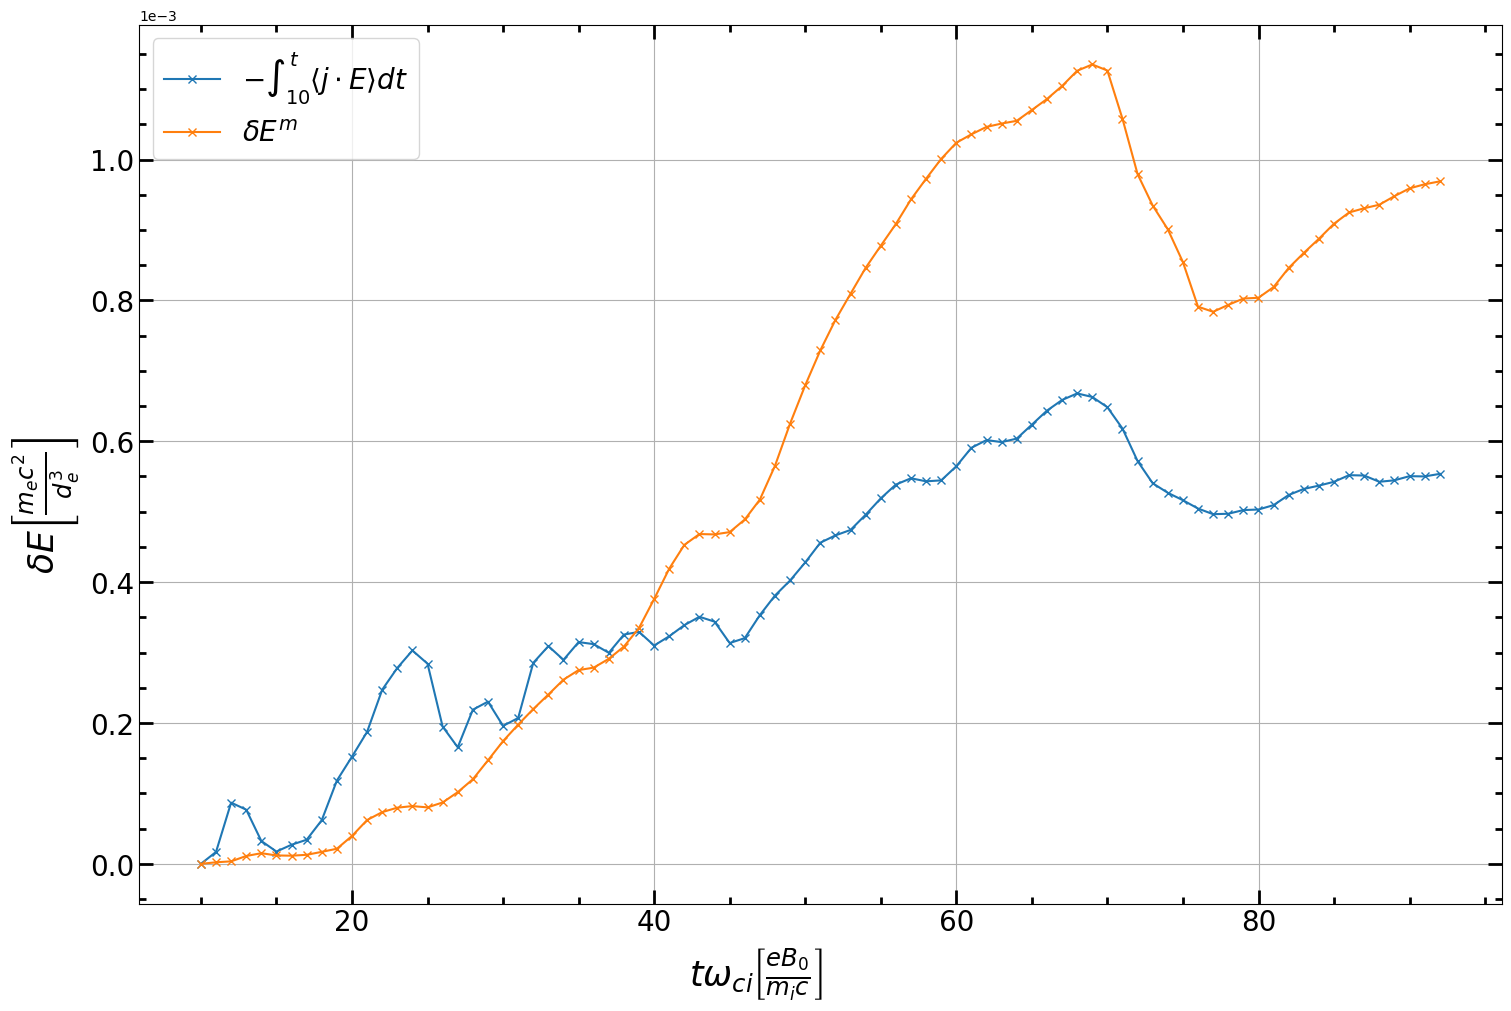

In [106]:
fig, axs = plt.subplots(1,1, figsize=(15, 10), sharex = True, layout='constrained')

axs.plot(twciN, JE_int, marker = 'x', 
         label=r'$-\int_{'f'{int(np.round(twci[n],0))}'r'}^t \langle j\cdot E \rangle dt$')
axs.plot(twciN, dE,marker = 'x', label=r'$\delta E^m$')
axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.legend(loc = 'upper left', fontsize = 20)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs.tick_params(which='major', length=10, top = True, right =True)
axs.tick_params(which='minor', length=5 , top = True, right =True)
axs.grid()

fig.supylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3} \right] $', size = 25)
fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 25)

plt.savefig(figs + 'JE_dEM.jpg', dpi = 400)

In [107]:
# deck = 'KH_Lv1di/'
# deck = 'KH/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
deck = 'KH_400ppc/'
# deck = '/GEM_feb26/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_beta0.1/'

dirs = '/pscratch/sd/g/goodwill/' + deck

# figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info4 = tb.get_vpic_info(dirs)
times4 = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twce4 = np.linspace(0, times4[-1] * info['dt*wce'], len(times4))
twpe4 = np.linspace(0, times4[-1] * info['dt*wpe'], len(times4))
twci4 = np.linspace(0, times4[-1] * info['dt*wci'], len(times4))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

ds4 = tb.read_JE(dirs)
en4 = tb.read_calc_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

Text(0.5, 0.01, '$ t \\omega_{ci} \\left[ \\frac{e B_0}{m_i c} \\right]$')

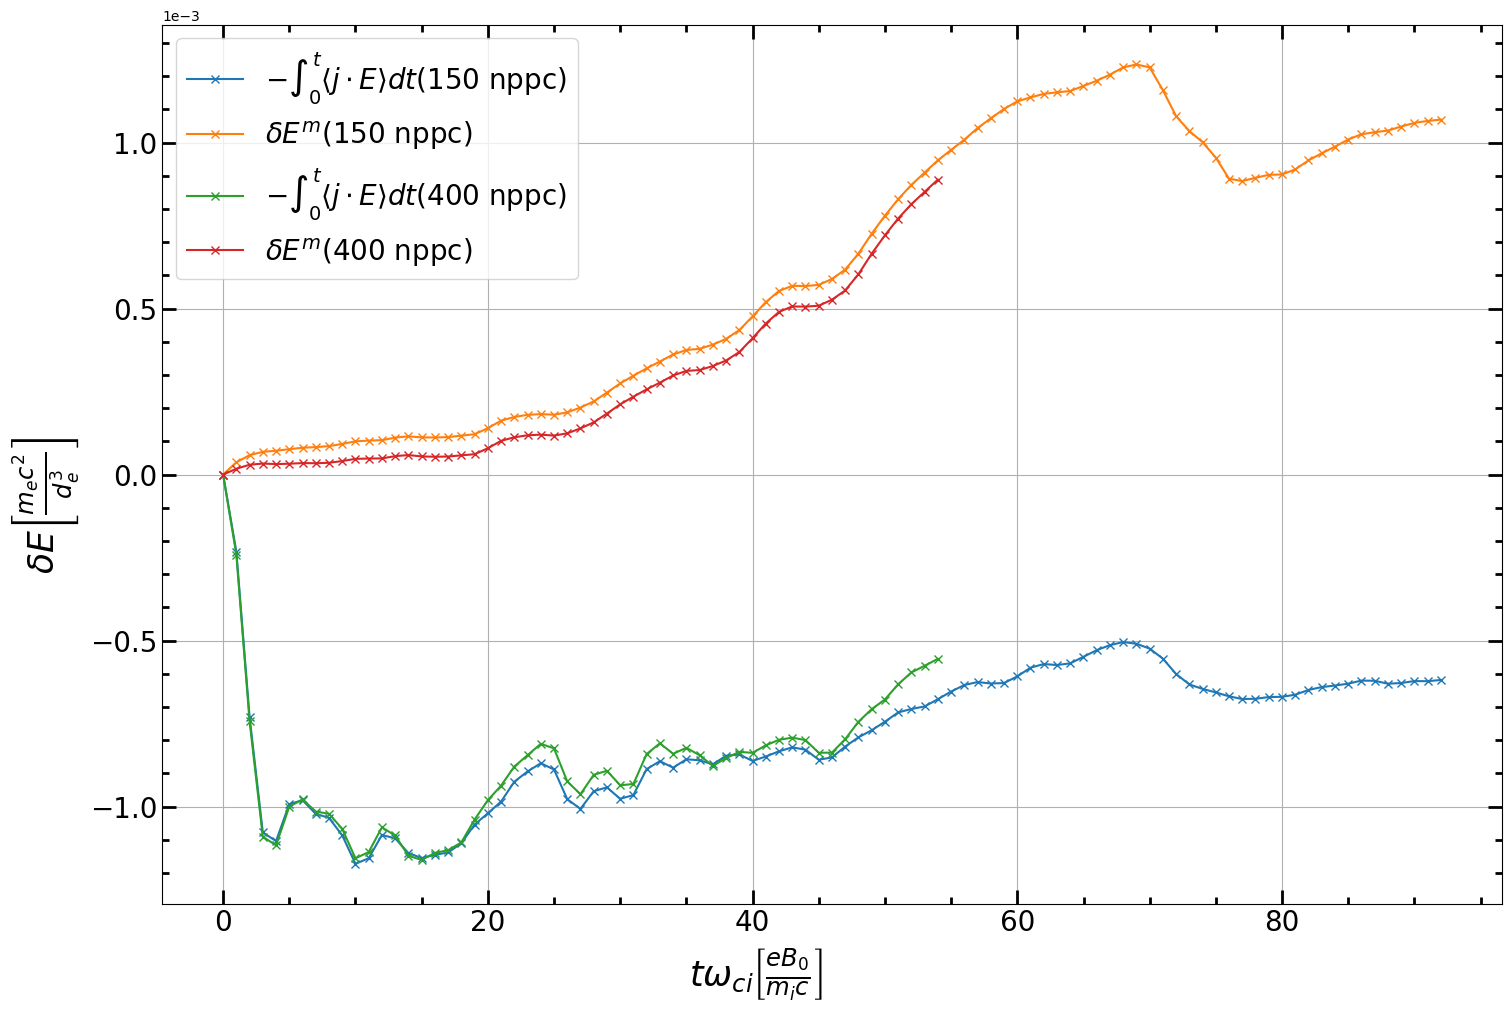

In [108]:
fig, axs = plt.subplots(1,1, figsize=(15, 10), sharex = True, layout='constrained')
nppc = int(info['nppc'])
axs.plot(twci, -sci.integrate.cumulative_trapezoid(ds['JE'] * dt, initial = 0), marker = 'x', label=r'$-\int_0^t \langle j\cdot E \rangle dt$'f'({nppc} nppc)')
axs.plot(twci, en['EM']-en['EM'][0]+en['EE']-en['EE'][0],marker = 'x', label=r'$\delta E^m$'f'({nppc} nppc)')

nppc4 = int(info4['nppc'])
axs.plot(twci4, -sci.integrate.cumulative_trapezoid(ds4['JE'] * dt, initial = 0), marker = 'x', label=r'$-\int_0^t \langle j\cdot E \rangle dt$'f'({nppc4} nppc)')
axs.plot(twci4, en4['EM']-en4['EM'][0]+en4['EE']-en4['EE'][0],marker = 'x', label=r'$\delta E^m$'f'({nppc4} nppc)')

axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.legend(loc = 'upper left', fontsize = 20)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs.tick_params(which='major', length=10, top = True, right =True)
axs.tick_params(which='minor', length=5 , top = True, right =True)
axs.grid()

fig.supylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3} \right] $', size = 25)
fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 25)

# plt.savefig(figs + 'JE_dEM.jpg', dpi = 400)